In [64]:
# Read the csv file and pass the data to the pandas dataframe
import pandas as pd
import csv

# Initialize the list to store the transactions
transactions = []
with open('groceries.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        transactions.append(row)

# Initialize the pandas dataframe
transaction_df = pd.DataFrame(transactions)
print(transaction_df.head())

                 0                    1               2   \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                 None            None   
3         pip fruit               yogurt    cream cheese   
4  other vegetables           whole milk  condensed milk   

                         3     4     5     6     7     8     9   ...    22  \
0               ready soups  None  None  None  None  None  None  ...  None   
1                      None  None  None  None  None  None  None  ...  None   
2                      None  None  None  None  None  None  None  ...  None   
3              meat spreads  None  None  None  None  None  None  ...  None   
4  long life bakery product  None  None  None  None  None  None  ...  None   

     23    24    25    26    27    28    29    30    31  
0  None  None  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  None  Non

In [65]:
# Reshape the dataframe to have each item in a single column
df_items = transaction_df.melt(var_name='Transaction', value_name='Item').drop(columns='Transaction')
print(df_items.head(10))

               Item
0      citrus fruit
1    tropical fruit
2        whole milk
3         pip fruit
4  other vegetables
5        whole milk
6        rolls/buns
7  other vegetables
8     potted plants
9        whole milk


In [66]:
# Count the frequency of item and list the top 10 items
item_counts = df_items['Item'].value_counts().head(10)
print(item_counts)

Item
whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
Name: count, dtype: int64


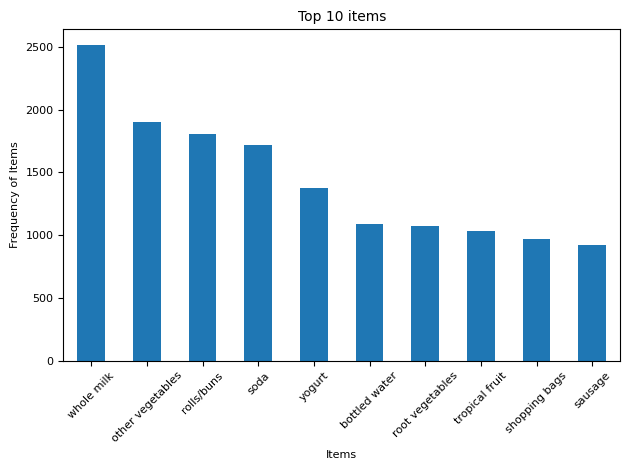

In [67]:
import matplotlib.pyplot as plt

# Plot the bar chart
item_counts.head(10).plot(kind='bar', rot=45)

# Set labels and title
plt.xlabel('Items', fontsize=8)
plt.ylabel('Frequency of Items', fontsize=8)
plt.title('Top 10 items', fontsize=10)

# Set tick label font size and adjust layout
plt.xticks(fontsize=8), plt.yticks(fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


In [70]:
# Conduct association rule mining using the apriori algorithm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Initialize the transaction encoder
encoder = TransactionEncoder()

# Transform the data into one-hot-encoding format
df_onehot = encoder.fit_transform(transactions)
df_onehot = pd.DataFrame(df_onehot, columns=encoder.columns_)
print(df_onehot.head(1))

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  

[1 rows x 169 columns]


In [75]:
# Find the frequent itemsets using the apriori algorithm, with a minimum support of 0.05
frequent_itemsets = apriori(df_onehot, min_support=0.05, use_colnames=True)

# Generate the association rules based on different metrics
rules_support = association_rules(frequent_itemsets,
                                  metric='support',
                                  min_threshold=0.05)
rules_confidence = association_rules(frequent_itemsets,
                                     metric='confidence',
                                     min_threshold=0.05)
rules_lift = association_rules(frequent_itemsets,
                               metric='lift',
                               min_threshold=1.0)

print('Total number of rules:', len(rules_support))
print('----------------------------------------')
print('Total number of rules:', len(rules_confidence))
print('----------------------------------------')
print('Total number of rules:', len(rules_lift))

Total number of rules: 6
----------------------------------------
Total number of rules: 6
----------------------------------------
Total number of rules: 6


In [76]:
# Lower the support threshold to 0.01 as the 5% support threshold yielded small number of rules
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)
rules_support = association_rules(frequent_itemsets,
                                  metric='support',
                                  min_threshold=0.01)
rules_confidence = association_rules(frequent_itemsets,
                                     metric='confidence',
                                     min_threshold=0.01)
rules_lift = association_rules(frequent_itemsets,
                               metric='lift',
                               min_threshold=1.0)

print('Total number of rules:', len(rules_support))
print('----------------------------------------')
print('Total number of rules:', len(rules_confidence))
print('----------------------------------------')
print('Total number of rules:', len(rules_lift))

Total number of rules: 618
----------------------------------------
Total number of rules: 618
----------------------------------------
Total number of rules: 598


Text(0.5, 1.0, 'Antecedent Support vs. Consequent Support')

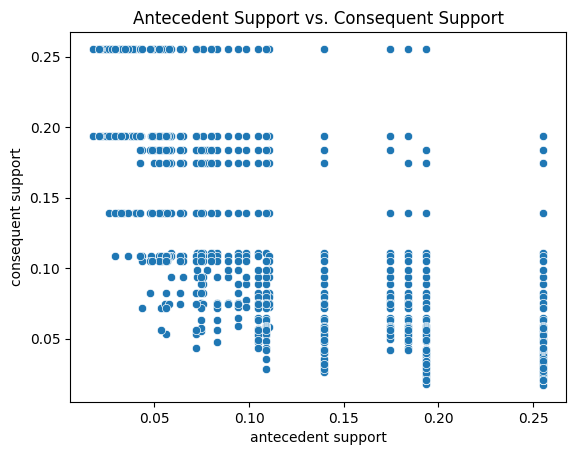

In [85]:
# Visualising rules in scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='antecedent support',
                y='consequent support',
                data=rules_support)
plt.title('Antecedent Support vs. Consequent Support')

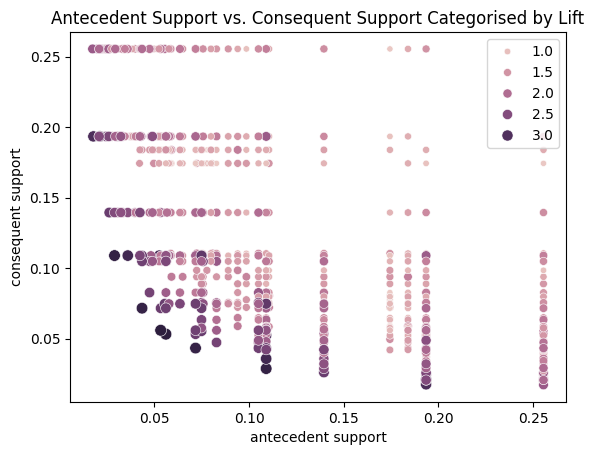

In [91]:
# Adding the third metrics in the scatterplot visualisation
sns.scatterplot(x='antecedent support',
                y='consequent support',
                size='lift',
                hue='lift',
                data=rules_support)
plt.title('Antecedent Support vs. Consequent Support Categorised by Lift')
plt.legend(loc='upper right')
plt.show()

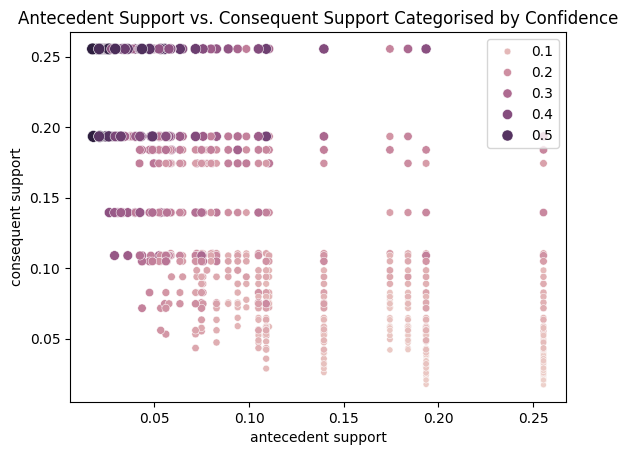

In [92]:
# Adding the third metrics in the scatterplot visualisation
sns.scatterplot(x='antecedent support',
                y='consequent support',
                size='confidence',
                hue='confidence',
                data=rules_support)
plt.title('Antecedent Support vs. Consequent Support Categorised by Confidence')
plt.legend(loc='upper right')
plt.show()

In [150]:
# Generating and filtering associating rules based on multiple metrics
rules = association_rules(frequent_itemsets,
                          metric='support',
                          min_threshold=0.01)
rules = rules[rules['confidence'] > 0.4]
rules = rules[rules['lift'] > 1]
print('Total number of rules based on multple metrics: ', len(rules))

Total number of rules based on multple metrics:  62


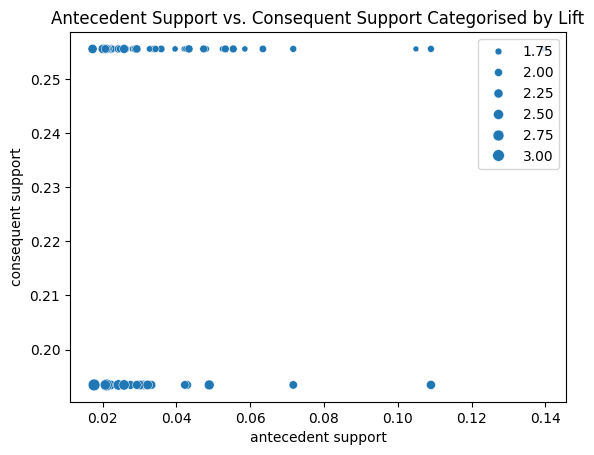

In [151]:
# Visualising rules using seaborn scatterplot
sns.scatterplot(x='antecedent support',
                y='consequent support',
                size='lift',
                data=rules)
plt.title('Antecedent Support vs. Consequent Support Categorised by Lift')
plt.legend(loc='upper right')
plt.show()

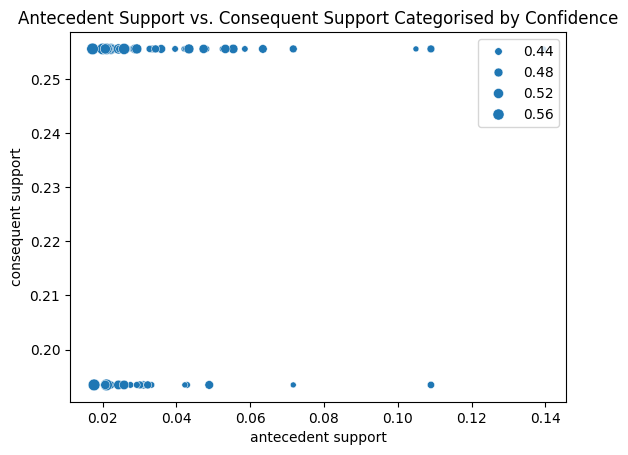

In [152]:
# Visualising rules using seaborn scatterplot
sns.scatterplot(x='antecedent support',
                y='consequent support',
                size='confidence',
                data=rules)
plt.title('Antecedent Support vs. Consequent Support Categorised by Confidence')
plt.legend(loc='upper right')
plt.show()

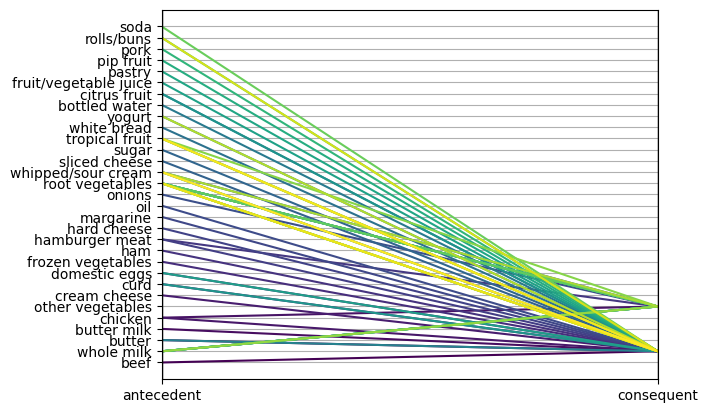

In [162]:
# Further visualising rules using parallel coordinates
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda x: list(x)[0])
rules['consequent'] = rules['consequents'].apply(lambda x: list(x)[0])
rules['rule'] = rules.index

# Define coordinates and label
coords = rules[['antecedent', 'consequent', 'rule']]

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap='viridis')
plt.legend().remove()
plt.show()

In [166]:
# Group by consequents and count the frequency
consequent_counts = rules['consequent'].value_counts().head(10)
print(consequent_counts)


consequent
whole milk          43
other vegetables    19
Name: count, dtype: int64


In [ ]:
# With a confidence threshold set at 0.4, the association analysis highlighted robust patterns of item co-occurrence in customer transactions. Notably, "whole milk" and "other vegetables" emerged as prominent items, frequently associated with other products. Leveraging these insights can optimize retail strategies, including product placement, promotions, and inventory management, to enhance customer satisfaction and drive sales.